In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import seaborn as sns
from scipy import linalg
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
from scipy.special import comb

In [2]:
gene_rpkm=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

(1680, 24057)

In [ ]:
gene_rpkm=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

In [3]:
new_header = gene_rpkm.iloc[0]
gene_rpkm = gene_rpkm[1:]
gene_rpkm.columns = new_header

In [ ]:
cellmeta=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\cell_metadata.csv")
cellmeta.shape

In [4]:
cellmeta=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/cell_metadata.csv")
cellmeta.shape

(1679, 16)

In [5]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']
Excitatory_cells=excitatory_meta['long_name']
inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']
inhib_cells = inhib_meta['long_name']

In [6]:
inhib_cells.shape

(761,)

In [7]:
excitatory_gene_rpkm=gene_rpkm.loc[Excitatory_cells]
inhib_meta_rpkm = gene_rpkm.loc[inhib_cells]

df = pd.DataFrame()

df = df.append(excitatory_gene_rpkm)
df = df.append(inhib_meta_rpkm)

df

Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101406,0,10.9,0.06,0,0,219.01,1.63,0,0,0.1,...,0,0,0,0,0,0,0,729.64,458.86,458.86
A01101407,0,191.23,70.19,0,0.53,134.03,6.35,0,0,200.77,...,0,0,0,0,0,0,0,746.42,336.74,336.74
A01101408,0,67.41,1.82,0,0,118.29,0,0,0,68.43,...,0,0,0,0,0,0,0,799.18,447.15,447.15
A02271433,0,70.56,0,0,0,60.55,0,0,0,0,...,0,0,0,0,0,0,0,1363.71,524.27,524.27
A02271434,0,73.35,20.88,0,0,122.69,46.68,0,0,177.3,...,0,0,0,0,0,0,0,1138.54,723.63,723.63
A02271436,0,6.16,10.12,0,0,156.62,0,0,0,8.76,...,0,0,0,0,0,0,0,886.58,755.7,755.7
A02271438,0,54.48,8.29,0,7.12,150.47,0.29,0,0,137.61,...,0,0,0,0,0,0,0,473.58,291.19,291.19
A12101407,0,0,80.74,0,0,0.51,0,0,0,0,...,0,0,0,0,0,0,0,455.33,356.9,356.9
A12101411,0,0,108.55,0,0,0,0,0,0,177.42,...,0,0,0,0,0,0,0,1988.22,1020.84,1020.84


In [8]:
excitatory_gene_rpkm = excitatory_gene_rpkm.apply(pd.to_numeric)
inhib_meta_rpkm = inhib_meta_rpkm.apply(pd.to_numeric)

df_numeric = df.apply(pd.to_numeric)

In [9]:
excitatory_gene_rpkm_matrix = excitatory_gene_rpkm.to_numpy()
inhib_meta_rpkm = inhib_meta_rpkm.to_numpy()

df_numpy = df_numeric.to_numpy()

In [10]:
df_numpy.shape

(1517, 24057)

In [11]:
#excitatory_gene_rpkm_matrix.dtype
#excitatory_gene_rpkm_matrix = np.transpose(excitatory_gene_rpkm_matrix)
#excitatory_gene_rpkm_matrix.shape

df_numpy = np.transpose(df_numpy)
df_numpy.shape

(24057, 1517)

In [ ]:
#preprocessing (dividing by the mean for each column)
#rows = excitatory_gene_rpkm_matrix.shape[1]
#
#means = np.arange(rows)
#
#for i in range(rows):
#    average = excitatory_gene_rpkm_matrix[:,i].mean()
#    means[i] = average
#    excitatory_gene_rpkm_matrix[:,i] = excitatory_gene_rpkm_matrix[:,i]/means[i]
#    
#excitatory_gene_rpkm_matrix

In [ ]:
#preprocessing (centering the data with the mean for each column)
#rows = excitatory_gene_rpkm_matrix.shape[1]
#
#means = np.arange(rows)
#
#for i in range(rows):
#    average = excitatory_gene_rpkm_matrix[:,i].mean()
#    means[i] = average
#    excitatory_gene_rpkm_matrix[:,i] = excitatory_gene_rpkm_matrix[:,i]-means[i]
#    
#excitatory_gene_rpkm_matrix

In [12]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

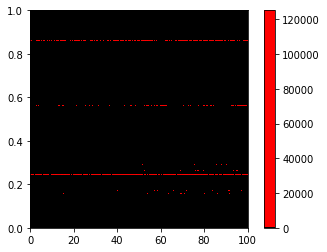

In [13]:
img = plt.imshow(df_numpy, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [14]:
#SVD
#U, s, VT = svd(excitatory_gene_rpkm_matrix)
U, s, vT = svd(df_numpy)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

#rank = xcitatory_gene_rpkm_matrix.shape[1] - count
rank = df_numpy.shape[1] - count
rank

1517

In [ ]:
U.shape

In [ ]:
test = U.dot(np.transpose(U))

identity_matrix = np.identity(len(U[:,1]))

np.allclose(test, identity_matrix, atol=1e-8)

In [ ]:
vT.shape

In [ ]:
test = vT.dot(np.transpose(vT))

identity_matrix = np.identity(len(vT[:,1]))

np.allclose(test, identity_matrix, atol=1e-08)

In [15]:
#U, s, VT = svd(excitatory_gene_rpkm_matrix)
U, s, vT = svd(df_numpy)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = vT[:rank, :]

In [ ]:
U.shape

In [ ]:
sigma.shape

In [ ]:
VT.shape

In [ ]:
uDotS = U.dot(sigma)
uDotSDotVt = uDotS.dot(VT)

testSVD = np.round(abs(excitatory_gene_rpkm_matrix - uDotSDotVt))
testSVD = np.matrix(testSVD)
if (testSVD.all() == 0):
    zero = True
zero

In [ ]:
print(np.max(U))
print(np.min(U))
print(np.mean(U))

In [ ]:
gBR = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
gBRmap = LinearSegmentedColormap.from_list("mycmap", gBR)

In [ ]:
img = plt.imshow(U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [ ]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

In [ ]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [ ]:
print(np.min(VT))
print(np.max(VT))
print(np.mean(VT))

In [ ]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
print(np.min(sigma))
print(np.max(sigma))
print(np.mean(sigma))

In [16]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']

inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']

ex_in_meta = pd.DataFrame()

ex_in_meta = excitatory_meta.append(inhib_meta)

ex_in_meta
ex_index = excitatory_meta.index
ex_length = len(ex_index) - 1
print("Excitatory is from 0-", ex_length, "index")

inhib_index = inhib_meta.index
inhib_length = len(inhib_index)
inhib_max_index = ex_length + inhib_length
print("Inhibitatory is from:", ex_length+1, "-", inhib_max_index)

Excitatory is from 0- 755 index
Inhibitatory is from: 756 - 1516


In [17]:
ex_inhib_rpkm =gene_rpkm.loc[ex_in_meta["long_name"]]

ex_inhib_rpkm = ex_inhib_rpkm.apply(pd.to_numeric)

ex_inhib_rpkm = ex_inhib_rpkm.to_numpy()

ex_inhib_rpkm = np.transpose(ex_inhib_rpkm)
ex_inhib_rpkm.shape

(24057, 1517)

In [18]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

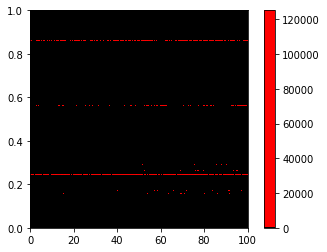

In [19]:
img = plt.imshow(ex_inhib_rpkm, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [20]:
#SVD
U, s, vT = svd(ex_inhib_rpkm)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

rank = ex_inhib_rpkm.shape[1] - count
rank

1517

In [21]:
U, s, VT = svd(ex_inhib_rpkm)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = VT[:rank, :]

In [22]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

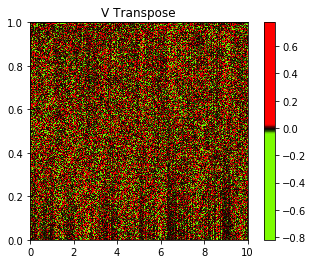

In [23]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

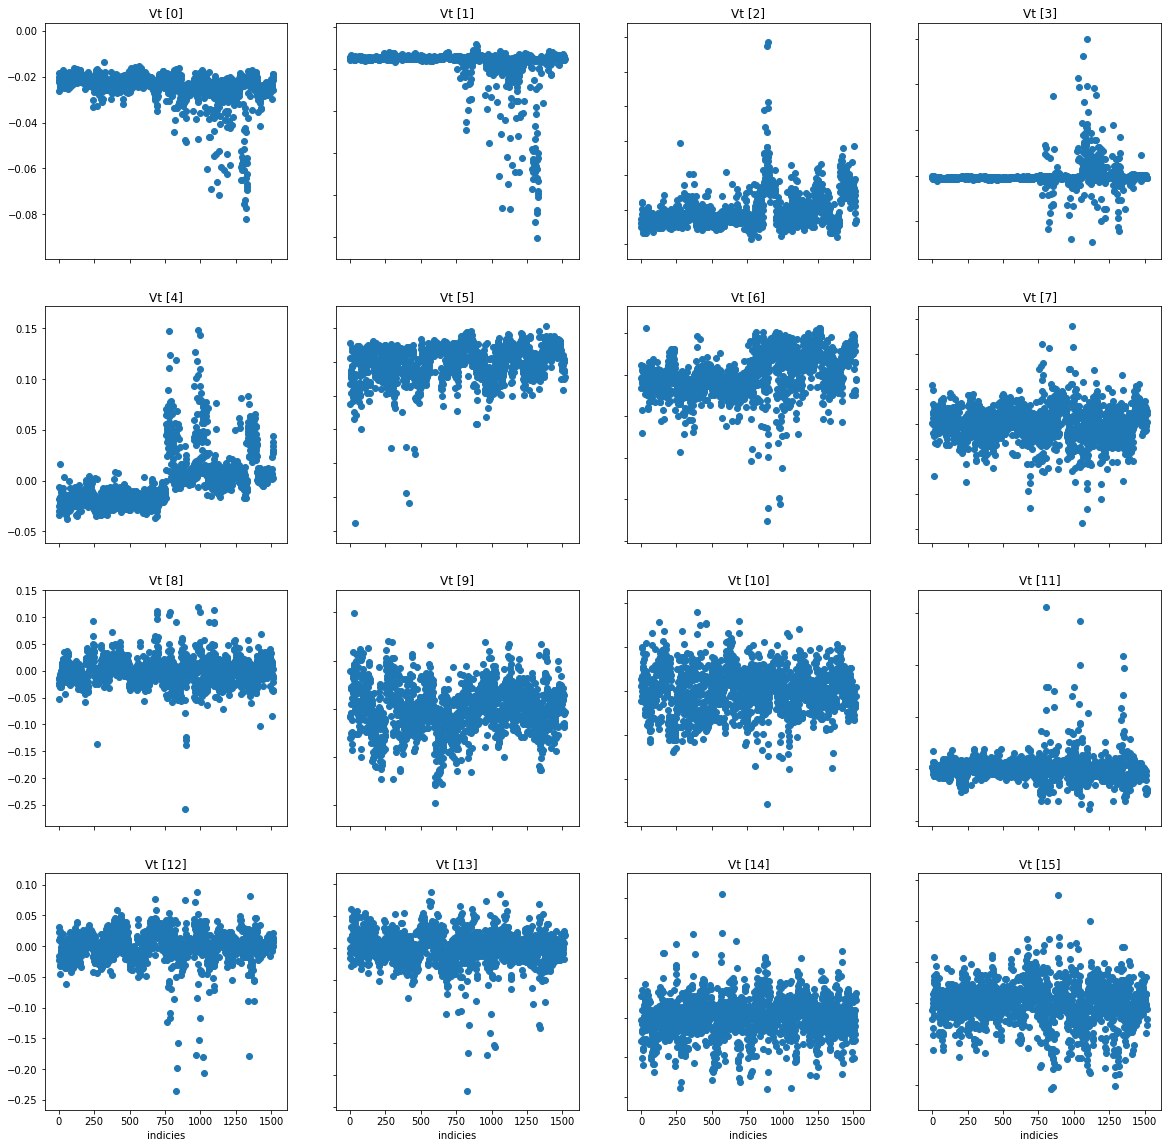

In [25]:
vx = np.arange(0,VT.shape[0],1)

fig, axs = plt.subplots(4, 4, figsize=(20,20), sharex='all')

for i in range(4):
    for k in range(4):
        axs[i, k].scatter(vx, VT[(4*i)+k,:])
        num = str((4*i)+k)
        axs[i, k].set_title('Vt ['+num+']')

#axs[3,0].scatter(vx, dns_VT[12,:])
#axs[3,0].set_title('Vt [12]')

        #axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0,1]')

#
for ax in axs.flat:
    ax.set(xlabel='indicies')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

In [28]:
v4 = VT[4,:]

inhib4 = v4[0:755]
excit4 = v4[756:1516]

stats.mannwhitneyu(inhib4,excit4)

MannwhitneyuResult(statistic=8257.0, pvalue=3.210550053086477e-235)

In [31]:
v6 = VT[6,:]

inhib6 = v6[0:755]
excit6 = v6[756:1516]

stats.mannwhitneyu(inhib6,excit6)

MannwhitneyuResult(statistic=124943.0, pvalue=5.5923605118922245e-81)

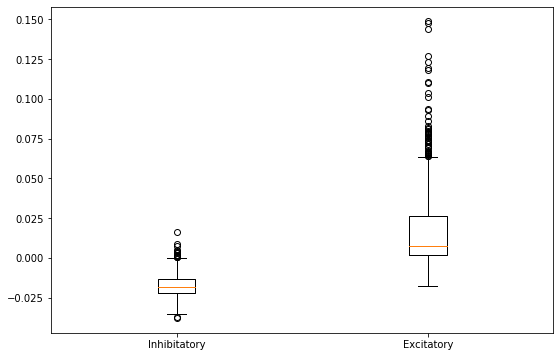

In [29]:
lists = [inhib4,excit4]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(lists)

ax = ax.set_xticklabels(['Inhibitatory', 'Excitatory'])

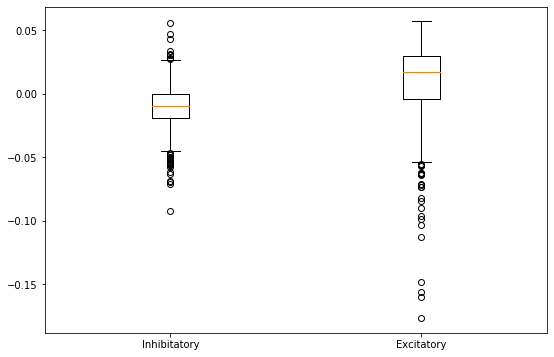

In [32]:
lists6 = [inhib6,excit6]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(lists6)

ax = ax.set_xticklabels(['Inhibitatory', 'Excitatory'])

In [34]:
N = len(VT[4,:])
n = len(inhib4)
K = 755
k = 755

summation =((comb(K,k)*comb(N-K,n-k))/(comb(N,n)))
    
summation = np.array(summation, dtype=np.longfloat)
summation

array(0., dtype=float128)

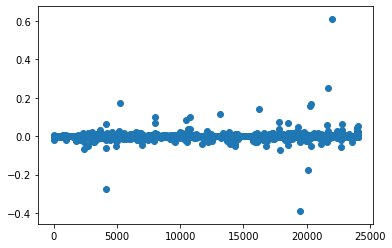

In [36]:
U4 = U[:,4]
Ux = np.arange(0,U.shape[0],1)
plt.scatter(Ux,U4)

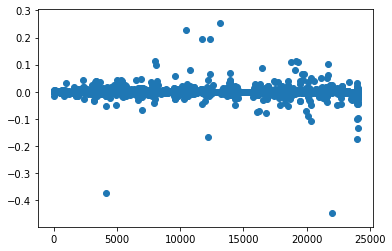

In [38]:
U6 = U[:,6]
Ux = np.arange(0,U.shape[0],1)
plt.scatter(Ux,U6)

In [39]:
gene_names = gene_rpkm.iloc[0]
gene_names.shape

(24057,)

In [40]:
gene_names_map_toU4 = {}

for i in range(U4.shape[0]):
    gene_names_map_toU4[gene_names.index[i]] = U4[i]
    
gene_names_map_toU4

{'0610005C13Rik': -5.276810987045306e-06,
 '0610007C21Rik': 0.003632215025868841,
 '0610007L01Rik': 3.639228019247136e-05,
 '0610007N19Rik': 2.405243570169964e-05,
 '0610007P08Rik': 1.5928597150498246e-05,
 '0610007P14Rik': 0.0006377139729194038,
 '0610007P22Rik': 0.0005297860725598627,
 '0610008F07Rik': 4.9055118475602684e-17,
 '0610009B14Rik': 2.6966353981360013e-06,
 '0610009B22Rik': 0.0006405423139581197,
 '0610009D07Rik': 0.0024532700816396174,
 '0610009L18Rik': -1.888675790933448e-05,
 '0610009O20Rik': 0.00039260121720890664,
 '0610010B08Rik': 0.0001368950780228338,
 '0610010F05Rik': -0.00014234478538352715,
 '0610010K14Rik': 0.0006227221603062173,
 '0610010O12Rik': -0.001961256847516894,
 '0610011F06Rik': 0.0009070842324884749,
 '0610011L14Rik': -0.0004242224293170454,
 '0610012G03Rik': -6.118492820817412e-05,
 '0610012H03Rik': -3.580932169525202e-07,
 '0610030E20Rik': -7.706994706684785e-07,
 '0610031J06Rik': -8.040889431987523e-05,
 '0610031O16Rik': -1.1853193744900894e-07,
 '

In [41]:
gene_names_map_toU6 = {}

for i in range(U6.shape[0]):
    gene_names_map_toU6[gene_names.index[i]] = U6[i]
    
gene_names_map_toU6

{'0610005C13Rik': 7.178196278998479e-06,
 '0610007C21Rik': 0.0022863277909302205,
 '0610007L01Rik': 0.00019798211573132532,
 '0610007N19Rik': 9.092387932192269e-05,
 '0610007P08Rik': -3.78706783596825e-05,
 '0610007P14Rik': -0.001928280219172241,
 '0610007P22Rik': -6.336102956577995e-05,
 '0610008F07Rik': -2.572564825340856e-17,
 '0610009B14Rik': -6.161171552561318e-07,
 '0610009B22Rik': 0.0007629184641862869,
 '0610009D07Rik': 0.002061177013689005,
 '0610009L18Rik': -9.655828029492159e-06,
 '0610009O20Rik': -0.00011152308860601097,
 '0610010B08Rik': 0.0004358554298281347,
 '0610010F05Rik': 0.00011919158525205062,
 '0610010K14Rik': -0.000530527142160104,
 '0610010O12Rik': -0.001877481753186795,
 '0610011F06Rik': 0.002033662044305598,
 '0610011L14Rik': 1.9116133167809744e-05,
 '0610012G03Rik': 0.00011531866195443354,
 '0610012H03Rik': -5.144388845494696e-07,
 '0610030E20Rik': -3.302785130113584e-05,
 '0610031J06Rik': 0.00024382148112386064,
 '0610031O16Rik': -1.612399669528302e-07,
 '06

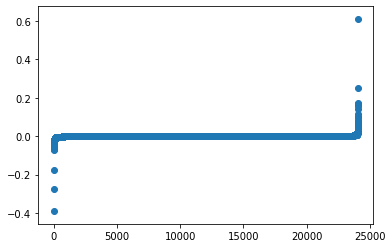

In [42]:
sorted_U4 = np.sort(U4)

plt.scatter(Ux,sorted_U4)

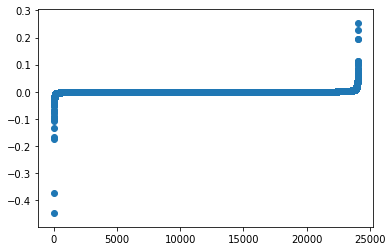

In [43]:
sorted_U6 = np.sort(U6)

plt.scatter(Ux,sorted_U6)

In [44]:
import collections

od4 = collections.OrderedDict(
    sorted(gene_names_map_toU4.items(), key=lambda x: x[1], reverse = True))

## sorted dictionary with U4 values as the keys and the gene name as the value

In [45]:
od4

OrderedDict([('Vip', 0.6107005522621279),
             ('Ubb', 0.2516751097985699),
             ('Cnr1', 0.17255647704057558),
             ('Tac2', 0.16728007007937454),
             ('Synpr', 0.15658407931763424),
             ('Penk', 0.14319647134828492),
             ('Mir690', 0.11654692542678045),
             ('Impact', 0.09869907126097992),
             ('Gad1', 0.09743841043145315),
             ('Hspa8', 0.08608006017346788),
             ('Resp18', 0.07121517668734828),
             ('Scg2', 0.06960961654848587),
             ('Fxyd6', 0.06903242489640152),
             ('Calb2', 0.06427125823321488),
             ('Zcchc12', 0.061990114963309306),
             ('Tubb2a', 0.058436540419715854),
             ('mt_GU332589', 0.05533207433582391),
             ('Slc6a1', 0.04556722422891659),
             ('mt_AF378830', 0.044031832114584314),
             ('mt_AK140265', 0.04237273491672589),
             ('Inpp5f', 0.03960826495920636),
             ('Rgs10', 0.039145857528

In [46]:
import collections

od6 = collections.OrderedDict(sorted(gene_names_map_toU6.items(),
                                   key=lambda x: x[1], reverse = True))

In [47]:
od6

OrderedDict([('Mir690', 0.2535695568425078),
             ('Hspa8', 0.22693950807391625),
             ('Mdh1', 0.1949800302820657),
             ('Ldhb', 0.194330559172076),
             ('Gad1', 0.11383010703554262),
             ('Slc25a5', 0.11270294794894652),
             ('Slc6a1', 0.10923105278441438),
             ('Serpini1', 0.10876884874770555),
             ('Ubc', 0.10372561249650276),
             ('Gapdh', 0.10039190000805955),
             ('Pkm2', 0.08869427903666097),
             ('Impact', 0.07977939298128538),
             ('Slc25a4', 0.07904677525091419),
             ('Ndrg4', 0.07017242737960232),
             ('Snrpn', 0.06611127110968515),
             ('Sparcl1', 0.06466054594827968),
             ('Mdh2', 0.06432503830566833),
             ('Ubb', 0.06242578842837258),
             ('Got1', 0.0562736680964299),
             ('Tmx2', 0.051816867261909816),
             ('Tubb2a', 0.050317890644853015),
             ('Tac1', 0.04990036998246285),
            